### Hotel Reservations DataSet

### DATA CLEANING AND EDA

In [9]:
import pandas as pd

df = pd.read_csv(r"C:\Users\adria\Documents\Bootcamp\Hotel Reservations.csv")

# Display the first few rows of the df and the data in it
print(df.head())

print(df.describe())

# Print the column names
print(df.columns)


# Remove rows with missing values
df.dropna(inplace=True) 

# Removing duplicated rows
df.drop_duplicates(inplace=True) 




  Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_

In [10]:
# Check for any inconsistencies in categorical columns
categorical_cols = ['booking_status']

for col in categorical_cols:
    print(f"Unique values in '{col}' column:", df[col].unique())

# Ensure consistency in numerical columns
numerical_cols = ['no_of_adults', 'no_of_children']

for col in numerical_cols:
    # Check for negative values
    negative_values = df[df[col] < 0]
    if not negative_values.empty:
        print(f"Negative values found in '{col}' column:")
        print(negative_values)

    # Check for non-integer values
    non_integer_values = df[~df[col].astype(str).str.isdigit()]
    if not non_integer_values.empty:
        print(f"Non-integer values found in '{col}' column:")
        print(non_integer_values)

Unique values in 'booking_status' column: ['Not_Canceled' 'Canceled']


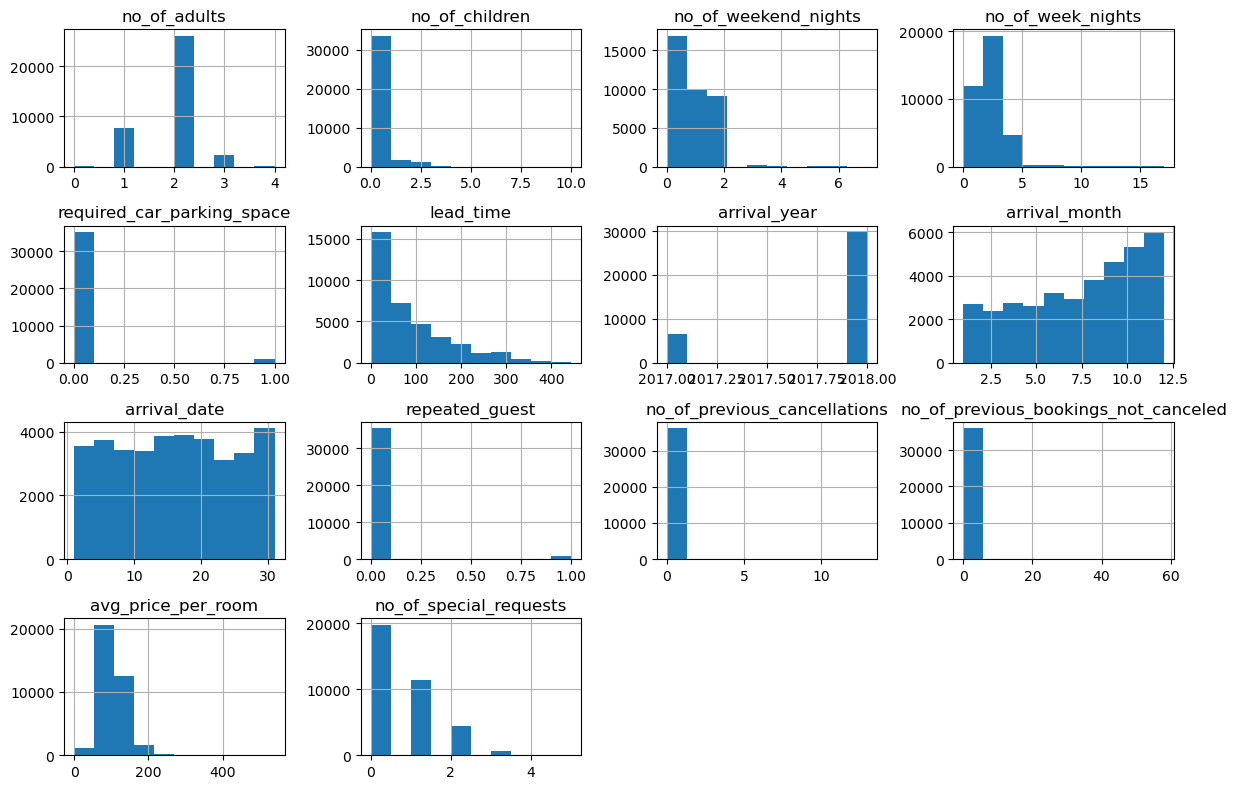

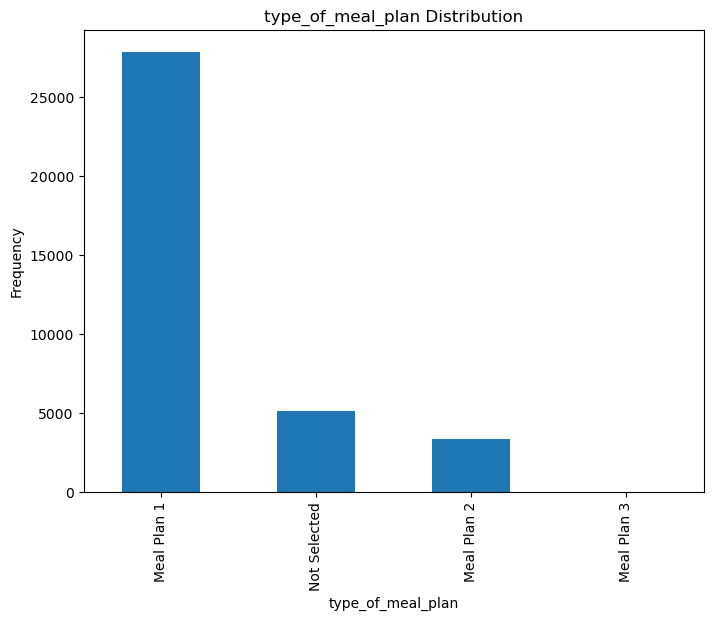

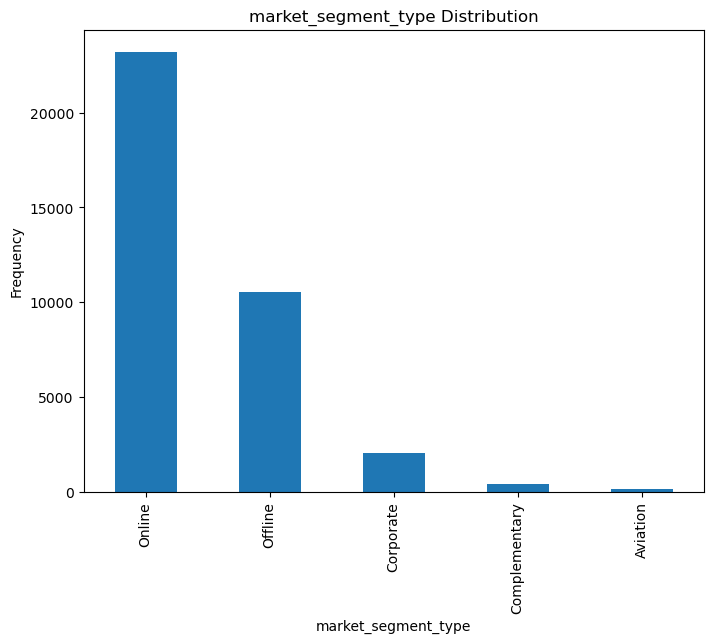

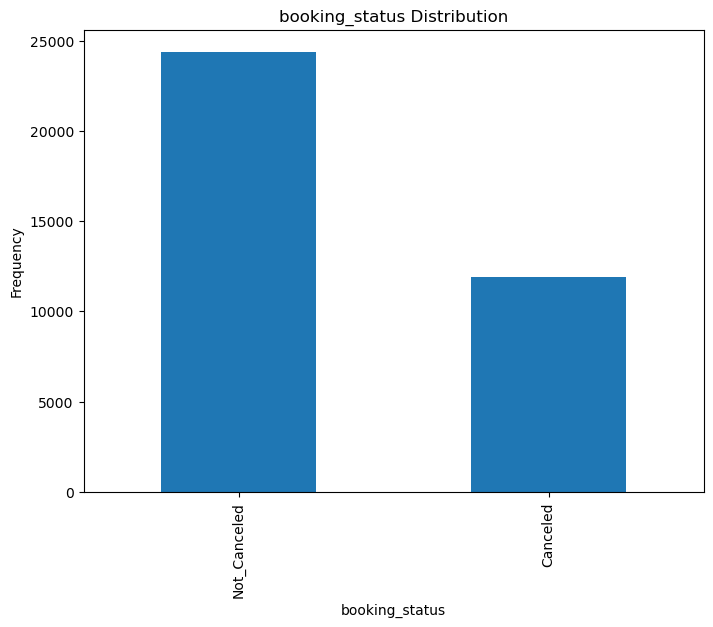

Distribution of target variable:
booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64


In [16]:

# Distribution Analysis
import matplotlib.pyplot as plt
# Histogram of numerical columns
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()


# Categorical Variable Analysis
# Bar plot of categorical columns
categorical_cols = ['type_of_meal_plan', 'market_segment_type', 'booking_status']
for col in categorical_cols:
    df[col].value_counts().plot(kind='bar', figsize=(8, 6))
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'{col} Distribution')
    plt.show()


# Check the distribution of target variable
target_variable = 'booking_status'
print("Distribution of target variable:")
print(df[target_variable].value_counts())

In [41]:
# Define the column names for each table
columns_table1 = ["Booking_ID", "no_of_adults", "no_of_children", "no_of_weekend_nights", "no_of_week_nights", "type_of_meal_plan", 
                  "required_car_parking_space", "room_type_reserved", "lead_time", "arrival_year", "arrival_month", "arrival_date"]
columns_table2 = ["Booking_ID", "market_segment_type", "repeated_guest", "no_of_previous_cancellations", "no_of_previous_bookings_not_canceled", "avg_price_per_room", "no_of_special_requests", "booking_status" ] 

# Create separate DataFrames
booking = df[columns_table1]
bookingdetails = df[columns_table2]

### MEDANO HOTEL WEBSCRAPING

In [27]:
import requests
from bs4 import BeautifulSoup

from IPython.display import display, HTML

html_code = "<h1 style='color:grey; font-weight:bold;'>Hotel Description</h1>"
display(HTML(html_code))


url = "https://www.medano.es/en/"

response = requests.get(url)

# Parse HTML content
soup = BeautifulSoup(response.content, "html.parser")

# Find all div elements with class "container"
container_divs = soup.find_all("div", class_="container")

# Initialize a variable to store the extracted text
extracted_text = ""


for container_div in container_divs:
    # Extract the text content of the div
    container_text = container_div.get_text(separator="\n").strip()
    
    # Check if the desired text is present in the container text
    if "At Hotel Médano" in container_text:
        # Remove excessive consecutive newlines
        extracted_text = container_text.replace("\n\n", "")
        print(extracted_text)
        break


HOTEL MÉDANO 
Welcome to Hotel Médano. Your holiday on the sea
At Hotel Médano we are incredibly lucky to be, literally, above the sea. For this reason, staying at our hotel is to create an endless number of experiences. From our terrace and solarium you can enjoy going down some stairs and end up going into the ocean. It is undoubtedly the best option to cool off while you relax.
Coming to Hotel Médano is undoubtedly creating an unforgettable experience. We have a variety of services to make your stay at our hotel perfect. We have an information and booking service for excursions, rent a car, laundry, massage... Everything you need!


### SEND TABLES TO MYSQL

In [ ]:
from sqlalchemy import create_engine

# MySQL connection parameters
username = 'root'
password = 'heregoespassword'
host = 'localhost'
port = '3306'
database_name = 'hotel'
schema_name = 'hotel'  # Specify the schema name here

# Create MySQL connection URL
connection_url = f'mysql+pymysql://{username}:{password}@{host}:{port}/{database_name}'

# Create SQLAlchemy engine
engine = create_engine(connection_url)

# Get a connection
connection = engine.connect()

# Close the connection
connection.close()

# Send DataFrames to MySQL with schema specified
booking.to_sql('booking', engine, if_exists='replace', index=False, schema=schema_name)
bookingdetails.to_sql('bookingdetails', engine, if_exists='replace', index=False, schema=schema_name)

print("Data successfully sent to MySQL with schema.")

Data successfully sent to MySQL with schema.
